In [1]:
import pandas as pd
import json
with open('label_1_ai (2).json') as f:
    data = json.load(f)

In [2]:
df1 = pd.DataFrame(data)
df1 = df1.rename(columns={0: "file"})


In [3]:
df1

,0,label
0,In the United States District Court for the Di...,1
1,In the United States District Court for the Di...,1
2,Citation: \n\nKenneth Antoine Chloe v. David D...,1
3,Citation: Espinoza-Palmer v. Department of Vet...,1
4,The United States Court of Appeals for the Fed...,1
...,...,...
395,Citation: Unpublished U.S. Court of Appeals fo...,1
396,Case Citation: Gugel v. Pacific Life Insurance...,1
397,Citation:\n\nUnited States Court of Appeals: F...,1
398,In a case pertaining to the U.S. Bankruptcy Co...,1


In [6]:
df1

,0,label
0,In the United States District Court for the Di...,1
1,In the United States District Court for the Di...,1
2,Citation: \n\nKenneth Antoine Chloe v. David D...,1
3,Citation: Espinoza-Palmer v. Department of Vet...,1
4,The United States Court of Appeals for the Fed...,1
...,...,...
395,Citation: Unpublished U.S. Court of Appeals fo...,1
396,Case Citation: Gugel v. Pacific Life Insurance...,1
397,Citation:\n\nUnited States Court of Appeals: F...,1
398,In a case pertaining to the U.S. Bankruptcy Co...,1


In [8]:
df1.rename(columns={'0': 'file'}, inplace=True)
df1

,file,label
0,In the United States District Court for the Di...,1
1,In the United States District Court for the Di...,1
2,Citation: \n\nKenneth Antoine Chloe v. David D...,1
3,Citation: Espinoza-Palmer v. Department of Vet...,1
4,The United States Court of Appeals for the Fed...,1
...,...,...
395,Citation: Unpublished U.S. Court of Appeals fo...,1
396,Case Citation: Gugel v. Pacific Life Insurance...,1
397,Citation:\n\nUnited States Court of Appeals: F...,1
398,In a case pertaining to the U.S. Bankruptcy Co...,1


In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import gensim

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Set up stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define a function to clean the text
def clean_text(text):
    # Remove the word 'Citation' and any other unwanted patterns
    text = re.sub(r'citation', '', text, flags=re.I)
    # Remove punctuation and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Remove additional whitespaces
    text = re.sub(r'\s+', ' ', text)
    return text.strip().lower()

# Define a function to preprocess text
def preprocess_text(text):
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 1]
    return tokens

# Clean the text
df1['cleaned_text'] = df1['file'].apply(clean_text)

# Preprocess the text
df1['processed_text'] = df1['cleaned_text'].apply(preprocess_text)

# Create Dictionary and Corpus
dictionary = gensim.corpora.Dictionary(df1['processed_text'])
corpus = [dictionary.doc2bow(text) for text in df1['processed_text']]



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
df1['processed_text']

0      [united, state, district, court, district, col...
1      [united, state, district, court, district, col...
2      [kenneth, antoine, chloe, david, dent, george,...
3      [espinozapalmer, department, veteran, affair, ...
4      [united, state, court, appeal, federal, circui...
                             ...                        
395    [unpublished, u, court, appeal, fourth, circui...
396    [case, gugel, pacific, life, insurance, compan...
397    [united, state, court, appeal, fourth, circuit...
398    [case, pertaining, u, bankruptcy, code, fourth...
399    [united, state, court, appeal, third, circuit,...
Name: processed_text, Length: 400, dtype: object

In [11]:
df1.to_csv('data.txt', sep='\t', index=False)

In [13]:
!pip install textstat


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 36.7 MB/s eta 0:00:00


In [14]:
import textstat


In [16]:
with open('data.txt', 'r') as file:
    text = file.read()


In [17]:
flesch_reading_ease = textstat.flesch_reading_ease(text)
smog_index = textstat.smog_index(text)
flesch_kincaid_grade = textstat.flesch_kincaid_grade(text)
coleman_liau_index = textstat.coleman_liau_index(text)
automated_readability_index = textstat.automated_readability_index(text)
dale_chall_readability_score = textstat.dale_chall_readability_score(text)
difficult_words = textstat.difficult_words(text)
linsear_write_formula = textstat.linsear_write_formula(text)
gunning_fog = textstat.gunning_fog(text)
text_standard = textstat.text_standard(text)

# Print the results
print(f"Flesch Reading Ease: {flesch_reading_ease}")
print(f"SMOG Index: {smog_index}")
print(f"Flesch-Kincaid Grade: {flesch_kincaid_grade}")
print(f"Coleman-Liau Index: {coleman_liau_index}")
print(f"Automated Readability Index: {automated_readability_index}")
print(f"Dale-Chall Readability Score: {dale_chall_readability_score}")
print(f"Difficult Words: {difficult_words}")
print(f"Linsear Write Formula: {linsear_write_formula}")
print(f"Gunning Fog: {gunning_fog}")
print(f"Text Standard: {text_standard}")


Flesch Reading Ease: 15.21
SMOG Index: 20.9
Flesch-Kincaid Grade: 22.8
Coleman-Liau Index: 15.62
Automated Readability Index: 31.6
Dale-Chall Readability Score: 2.96
Difficult Words: 15558
Linsear Write Formula: 12.6
Gunning Fog: 19.39
Text Standard: 12th and 13th grade


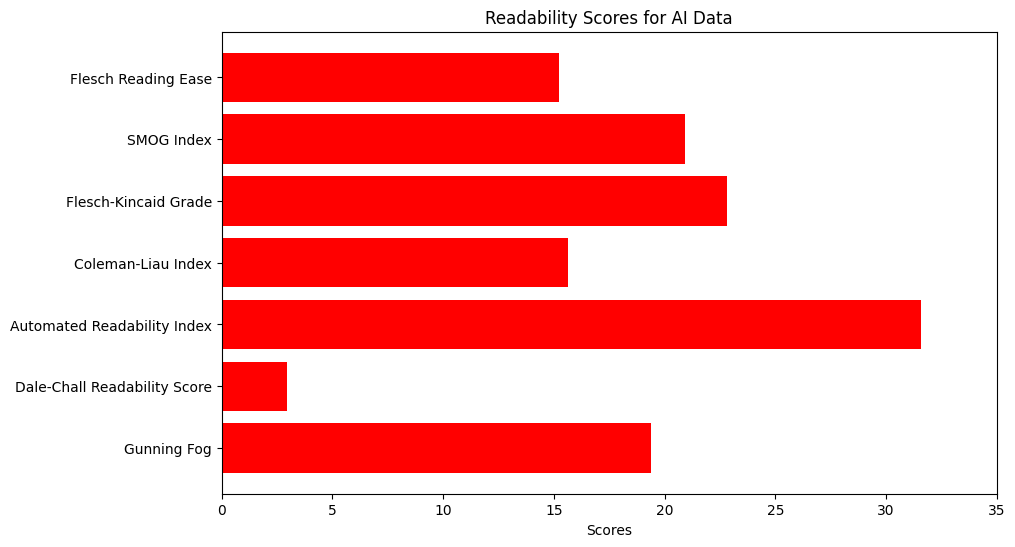

In [19]:
import matplotlib.pyplot as plt
import textstat

with open('data.txt', 'r') as file:
    text = file.read()

# Calculate various readability scores
scores = {
    'Flesch Reading Ease': textstat.flesch_reading_ease(text),
    'SMOG Index': textstat.smog_index(text),
    'Flesch-Kincaid Grade': textstat.flesch_kincaid_grade(text),
    'Coleman-Liau Index': textstat.coleman_liau_index(text),
    'Automated Readability Index': textstat.automated_readability_index(text),
    'Dale-Chall Readability Score': textstat.dale_chall_readability_score(text),
    'Gunning Fog': textstat.gunning_fog(text)
}

# Create bar plot
plt.figure(figsize=(10, 6))
plt.barh(list(scores.keys()), list(scores.values()), color='red')
plt.xlabel('Scores')
plt.title('Readability Scores for AI Data')
plt.xlim(0, 35)
plt.gca().invert_yaxis()  # To display the highest score at the top
plt.show()
